In [1]:
import requests

# Spotify API credentials
client_id = "4a5d601ff9e649a7912a92fd1754e733"
client_secret = "963527c72c4643b99a03679e61ddbdec"

# Get access token
auth_response = requests.post(
    "https://accounts.spotify.com/api/token",
    {
        "grant_type": "client_credentials",
        "client_id": client_id,
        "client_secret": client_secret,
    },
)
auth_response_data = auth_response.json()
access_token = auth_response_data["access_token"]

# Set up headers
headers = {"Authorization": f"Bearer {access_token}"}

# Example request: Search for artists in the "pop" genre
response = requests.get(
    "https://api.spotify.com/v1/search",
    headers=headers,
    params={"q": "genre:schlager", "type": "artist", "limit": 100},
)
data = response.json()

# Print the artist names
for artist in data["artists"]["items"]:
    print(artist["name"], artist["popularity"])

KeyError: 'artists'

In [2]:
import requests

# Spotify API credentials
client_id = "4a5d601ff9e649a7912a92fd1754e733"
client_secret = "963527c72c4643b99a03679e61ddbdec"

# Get access token
auth_response = requests.post(
    "https://accounts.spotify.com/api/token",
    {
        "grant_type": "client_credentials",
        "client_id": client_id,
        "client_secret": client_secret,
    },
)
access_token = auth_response.json()["access_token"]
headers = {"Authorization": f"Bearer {access_token}"}

# Function to get Schlager tracks for a given year
def get_schlager_tracks_by_year(year):
    response = requests.get(
        "https://api.spotify.com/v1/search",
        headers=headers,
        params={"q": f"genre:schlager year:{year}", "type": "track", "limit": 50},
    )
    data = response.json()
    tracks = [
        {
            "name": track["name"],
            "artist": ", ".join(artist["name"] for artist in track["artists"]),
            "popularity": track["popularity"],
            "release_date": track["album"]["release_date"],
        }
        for track in data["tracks"]["items"]
    ]
    return tracks

# Collect tracks from 2008 (spotify launched that year) to 2024
all_tracks = []
for year in range(2008, 2025):
    print(f"Fetching Schlager tracks for {year}...")
    all_tracks.extend(get_schlager_tracks_by_year(year))

# Save results or analyze
print(f"Collected {len(all_tracks)} tracks.")

Fetching Schlager tracks for 2008...
Fetching Schlager tracks for 2009...
Fetching Schlager tracks for 2010...
Fetching Schlager tracks for 2011...
Fetching Schlager tracks for 2012...
Fetching Schlager tracks for 2013...
Fetching Schlager tracks for 2014...
Fetching Schlager tracks for 2015...
Fetching Schlager tracks for 2016...
Fetching Schlager tracks for 2017...
Fetching Schlager tracks for 2018...
Fetching Schlager tracks for 2019...
Fetching Schlager tracks for 2020...
Fetching Schlager tracks for 2021...
Fetching Schlager tracks for 2022...
Fetching Schlager tracks for 2023...
Fetching Schlager tracks for 2024...
Collected 850 tracks.


In [3]:
# Display the first 10 tracks
for track in all_tracks[:10]:
    print(track)

{'name': 'Sweet Caroline - Single Version', 'artist': 'DJ Ötzi', 'popularity': 57, 'release_date': '2008'}
{'name': 'Ein Bett Im Kornfeld', 'artist': 'Jürgen Drews', 'popularity': 52, 'release_date': '2008-10-17'}
{'name': '1000 und 1 Nacht - Remastered 2008', 'artist': 'Klaus Lage', 'popularity': 54, 'release_date': '2008-01-01'}
{'name': 'Eine neue Liebe ist wie ein neues Leben', 'artist': 'Jürgen Marcus', 'popularity': 51, 'release_date': '2008-10-11'}
{'name': 'Irgendwann, Irgendwo, Irgendwie', 'artist': 'Jürgen Drews', 'popularity': 46, 'release_date': '2008-10-17'}
{'name': 'Ich fang dir den Mond', 'artist': 'Andreas Martin', 'popularity': 44, 'release_date': '2008-05-16'}
{'name': 'Noch in 100.000 Jahren - Single Version', 'artist': 'DJ Ötzi', 'popularity': 41, 'release_date': '2008'}
{'name': 'Sie vergass zu verzeihn - Radio', 'artist': 'Christian Lais', 'popularity': 40, 'release_date': '2008-02-20'}
{'name': 'Es ist Weihnachtszeit', 'artist': 'Nik P.', 'popularity': 37, 'rele

In [4]:
import pandas as pd

# Convert the list of dictionaries to a DataFrame
spotify_data_schlager_over_time = pd.DataFrame(all_tracks)

# Display the first few rows
spotify_data_schlager_over_time.head()


,name,artist,popularity,release_date
0,Sweet Caroline - Single Version,DJ Ötzi,57,2008
1,Ein Bett Im Kornfeld,Jürgen Drews,52,2008-10-17
2,1000 und 1 Nacht - Remastered 2008,Klaus Lage,54,2008-01-01
3,Eine neue Liebe ist wie ein neues Leben,Jürgen Marcus,51,2008-10-11
4,"Irgendwann, Irgendwo, Irgendwie",Jürgen Drews,46,2008-10-17


In [5]:
spotify_data_schlager_over_time.describe()

,popularity
count,850.000000
mean,37.949412
std,8.317523
min,14.000000
25%,32.000000
50%,38.000000
75%,44.000000
max,64.000000


In [6]:
spotify_data_schlager_over_time.head()

,name,artist,popularity,release_date
0,Sweet Caroline - Single Version,DJ Ötzi,57,2008
1,Ein Bett Im Kornfeld,Jürgen Drews,52,2008-10-17
2,1000 und 1 Nacht - Remastered 2008,Klaus Lage,54,2008-01-01
3,Eine neue Liebe ist wie ein neues Leben,Jürgen Marcus,51,2008-10-11
4,"Irgendwann, Irgendwo, Irgendwie",Jürgen Drews,46,2008-10-17


In [7]:
# Check rows where the release_date couldn't be parsed
print(spotify_data_schlager_over_time[spotify_data_schlager_over_time["release_date"].isna()])

# Apply this function to detect years (4-digit format) and convert them into complete dates
def fix_incomplete_dates(x):
    x = str(x)
    if len(x) == 4 and x.isdigit():  # Check if the value is a year
        return x + "-01-01"  # Add a default month and day
    return x  # Return the date as it is if it's not just a year

# Apply this function to the release_date column
spotify_data_schlager_over_time["release_date"] = spotify_data_schlager_over_time["release_date"].apply(fix_incomplete_dates)

# Convert the release_date to datetime again
spotify_data_schlager_over_time["release_date"] = pd.to_datetime(spotify_data_schlager_over_time["release_date"], errors="coerce")

# Extract the release year
spotify_data_schlager_over_time["release_year"] = spotify_data_schlager_over_time["release_date"].dt.year.astype("Int64")

# Display the cleaned DataFrame
spotify_data_schlager_over_time.head()


Empty DataFrame
Columns: [name, artist, popularity, release_date]
Index: []


,name,artist,popularity,release_date,release_year
0,Sweet Caroline - Single Version,DJ Ötzi,57,2008-01-01,2008
1,Ein Bett Im Kornfeld,Jürgen Drews,52,2008-10-17,2008
2,1000 und 1 Nacht - Remastered 2008,Klaus Lage,54,2008-01-01,2008
3,Eine neue Liebe ist wie ein neues Leben,Jürgen Marcus,51,2008-10-11,2008
4,"Irgendwann, Irgendwo, Irgendwie",Jürgen Drews,46,2008-10-17,2008


In [8]:
tracks_in_2020 = spotify_data_schlager_over_time[spotify_data_schlager_over_time["release_year"] == 2020]
print(tracks_in_2020)

                                                  name  \
600              Wegen Dir (Nachts wenn alles schläft)   
601                                    Es ist die Zeit   
602          Ich hab' geträumt von dir (2020 Remaster)   
603                                          Difigiano   
604                                Traktorführerschein   
605  Der hellste Stern (Böhmischer Traum) - Silverj...   
606                                 Dein Herz verliert   
607                                    One Night Stand   
608  Der hellste Stern (Böhmischer Traum) - Silverj...   
609          1000 Träume weit (Torneró) - Version 2020   
610                                              Marie   
611                Ich muss Dir was sagen - Single Mix   
612              Wegen Dir (Nachts wenn alles schläft)   
613                                        Party Mix I   
614                                 Der geilste Fehler   
615                I mog di so - Xtreme Sound Partymix   
616           

**Popularity:** This will provide the popularity score of each track, which reflects how well the track is performing (related to streams but not the exact count).
**Artist & Track Data:** You’ll also get the artist name, track name, and release year.
The popularity score provided by Spotify is a useful proxy for analyzing how the popularity of a genre, artist, or track has evolved over time. While it doesn’t give you raw stream counts, the popularity score (ranging from 0 to 100) is closely tied to listener engagement, including streams, playlist inclusions, and radio plays.
**Limitations:** The popularity score does not directly represent streams and can be influenced by factors such as playlist inclusion, recent plays, and algorithmic boosting.Popularity may skew towards newer tracks due to recency bias in Spotify’s algorithm.


In [46]:
#calcuate popularity mean over years
mean_popularity_per_year = spotify_data_schlager_over_time.groupby("release_year")["popularity"].mean()
print(mean_popularity_per_year)

#calculate highest mean popularity score and highest popularity year:
highest_popularity_year = mean_popularity_per_year.idxmax()
highest_mean_popularity = mean_popularity_per_year.max()


print(f"The highest popularity score: {highest_mean_popularity} is in year: {highest_popularity_year}")

#show the most popular tracks in the highest popularity year:
most_popular_tracks_in_highest_year = spotify_data_schlager_over_time[df_schlager["release_year"] == highest_popularity_year]
print("Tracks contributing to high popularity in this year:")
print(most_popular_tracks_in_highest_year)

release_year
2008    33.64
2009    33.04
2010    36.20
2011    33.42
2012    29.76
2013    35.06
2014    32.74
2015    35.12
2016    37.12
2017    39.58
2018    38.84
2019    37.30
2020    39.30
2021    41.12
2022    38.90
2023    42.22
2024    45.10
Name: popularity, dtype: float64
The highest popularity score: 45.1 is in year: 2024
Tracks contributing to high popularity in this year:
                                                  name  \
800                                         Handwerker   
801                                  Hallo kleine Maus   
802                                  Ich werde da sein   
803                     Aperol Spritz - Techno Version   
804                       Wer lieben will, muss fühlen   
805                            Es ist einfach passiert   
806                                 Das ist nicht fair   
807                                      Bock auf Bier   
808                                      Aperol Spritz   
809                            

In [52]:
#we see that:
#the popularity mean score is the same over all the artist and tracks in 2024
#maye we should then use the "normal" popularity score bc it is more individual!

#now we look at the top 50 artist with the highest populairty score:

top_50 = spotify_data_schlager_over_time.sort_values(by="popularity", ascending=False).head(50)

print("Top 50:")
print(top_50[["name", "artist", "popularity", "release_year"]])

#top 10:
top_10 = spotify_data_schlager_over_time.sort_values(by="popularity", ascending=False).head(10)

print("\n Top 10:")
print(top_10[["name", "artist", "popularity", "release_year"]])

Top 50:
                                                  name  \
250                            Atemlos durch die Nacht   
800                                         Handwerker   
350                                           Hulapalu   
450                                          Herzbeben   
12                                      La Vie en rose   
50       Ich will immer wieder... dieses Fieber spür'n   
700   Der Zug hat keine Bremse - Mallorcastyle Edition   
100                               Idiot - Version 2011   
500                                   Regenbogenfarben   
101                         1000 Träume weit (Tornero)   
602          Ich hab' geträumt von dir (2020 Remaster)   
0                      Sweet Caroline - Single Version   
519                                             Moskau   
502               Was für eine geile Zeit - Single Mix   
106                               Hey Baby (Radio Mix)   
102                               I sing a Liad für di   
501   

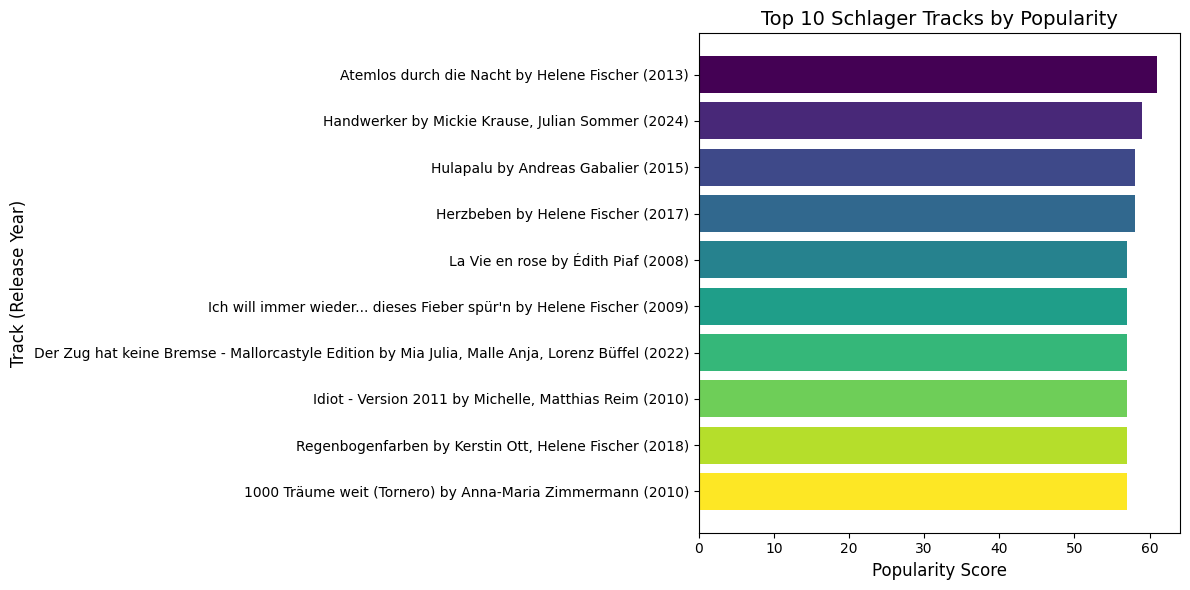

In [161]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

#list of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10)))  # Using the "viridis" colormap

# Plot horizontal bar chart with different colors for each track
plt.barh(
    top_10["name"] + " by " + top_10["artist"] + " (" + top_10["release_year"].astype(str) + ")",
    top_10["popularity"],
    color=colors  
)

plt.title("Top 10 Schlager Tracks by Popularity", fontsize=14)
plt.xlabel("Popularity Score", fontsize=12)
plt.ylabel("Track (Release Year)", fontsize=12)
plt.gca().invert_yaxis()  # Invert to have the highest score on top
plt.tight_layout()


#save as pdf for poster use:
plt.savefig("Top 10 Schlager Tracks by Popularity.pdf")

plt.show()

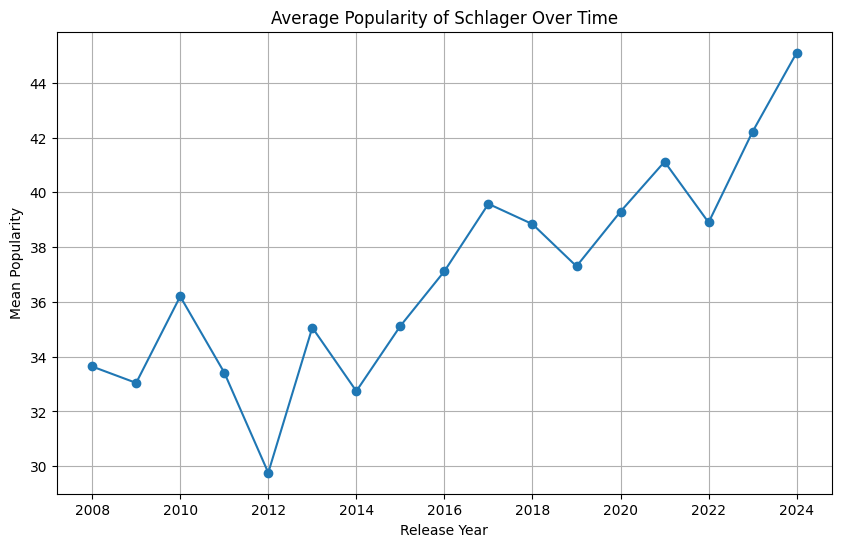

In [160]:
#visualize the average (mean) popularity of schlager over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mean_popularity_per_year.plot(kind='line', marker='o') #variable from above 
plt.title('Average Popularity of Schlager Over Time')
plt.xlabel('Release Year')
plt.ylabel('Mean Popularity')
plt.grid()

#save figure:
plt.savefig("Average Popularity of Schlager over Time.pdf", format = "pdf")

plt.show()

In [32]:
#artists/tracks with the highest average popularity of every year:
most_popular_tracks = spotify_data_schlager_over_time.loc[spotify_data_schlager_over_time.groupby("release_year")["popularity"].idxmax()]
print(most_popular_tracks)

                                                  name  \
12                                      La Vie en rose   
50       Ich will immer wieder... dieses Fieber spür'n   
100                               Idiot - Version 2011   
152                              Die Hölle morgen früh   
204                100.000 leuchtende Sterne - Clubmix   
250                            Atemlos durch die Nacht   
300         Warum hast Du nicht nein gesagt - Club Mix   
350                                           Hulapalu   
400                              Sieben Leben für dich   
450                                          Herzbeben   
500                                   Regenbogenfarben   
552                                    Eine Woche wach   
602          Ich hab' geträumt von dir (2020 Remaster)   
650             Ich liebe das Leben - Stereoact #Remix   
700   Der Zug hat keine Bremse - Mallorcastyle Edition   
751  Atemlos durch die Nacht - 10 Year Anniversary ...   
800           

release_year
2008    8.845061
2009    6.493199
2010    8.985249
2011    7.743569
2012    7.484842
2013    9.896217
2014    7.917457
2015    7.723909
2016    7.212914
2017    7.145971
2018    8.809457
2019    7.048665
2020    5.330888
2021    4.880783
2022    5.863237
2023    6.007784
2024    5.067906
Name: popularity, dtype: float64


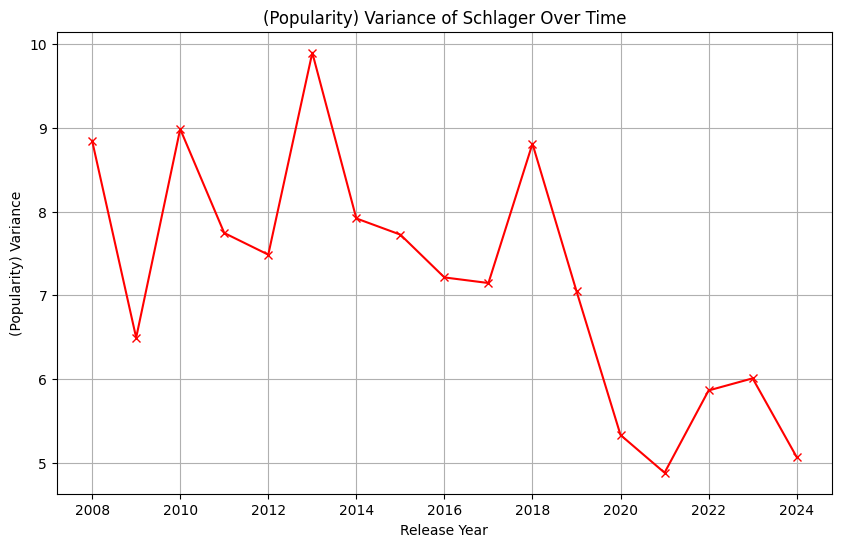

In [158]:
#for consistency in popularity calculate variance:
popularity_variance = spotify_data_schlager_over_time.groupby("release_year")["popularity"].std()
print(popularity_variance)

#visualize the popularity variance and see how it develops over the years (2008 - 2024):
plt.figure(figsize=(10, 6))
popularity_variance.plot(kind='line', color = "red",  marker='x') #variable from above 
plt.title('(Popularity) Variance of Schlager Over Time')
plt.xlabel('Release Year')
plt.ylabel("(Popularity) Variance")
plt.grid()


#save figure:
plt.savefig("(Popularity) Variance of Schlager Over Time.pdf")

plt.show()

**Interpretation of variance:**
    
2013 (9.90), 2008 (8.85), and 2010 (8.99) have the highest standard deviations. 
This means that in these years, there was a wider range of popularity scores for tracks. 
There may have been some tracks with significantly higher popularity and some with much lower popularity compared to the average for that year.
                                                                                                                                
2021 (4.88), 2020 (5.33), and 2024 (5.07) have the lowest standard deviations. 
This suggests that the popularity of tracks in these years was more consistent, with less variation between the highest and lowest scores.


In [66]:
#artist with the most tracks over the years:
artist_track_count = spotify_data_schlager_over_time.groupby('artist')['name'].count()
top_artists = artist_track_count.sort_values(ascending=False).head(10)
print(top_artists)

artist
Helene Fischer         52
Andreas Gabalier       48
Melissa Naschenweng    31
Nockis                 27
Udo Jürgens            26
Roland Kaiser          26
Nik P.                 23
DJ Ötzi                22
Maite Kelly            19
Andrea Berg            19
Name: name, dtype: int64


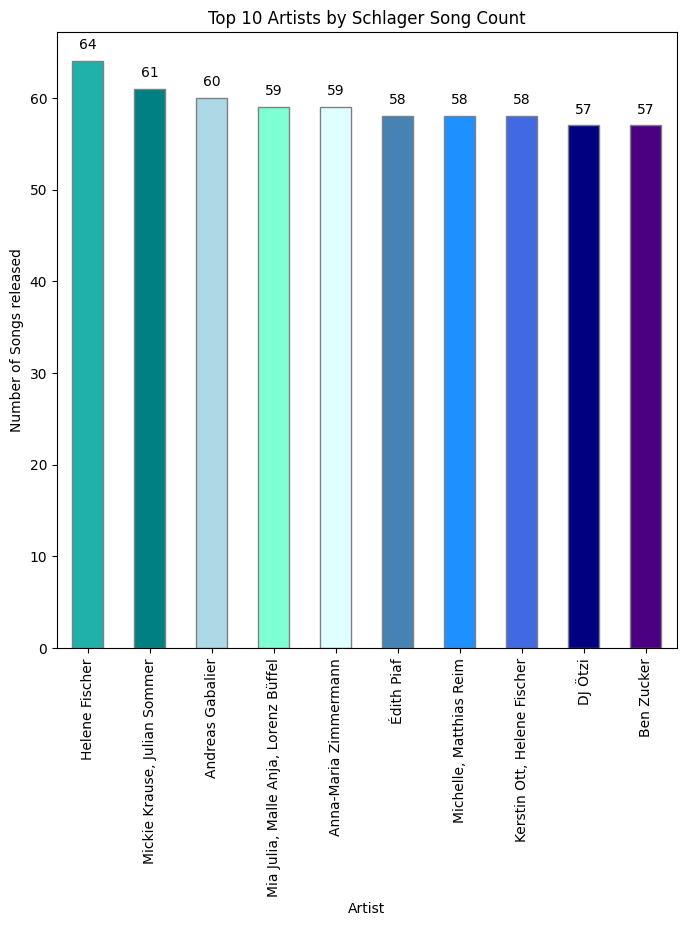

In [31]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap #for the color map


colors = ["lightseagreen", "teal", "lightblue", "aquamarine", "lightcyan", "steelblue", "dodgerblue", "royalblue", "navy","indigo"]

plt.figure(figsize = (8,8))
top_artists.plot(kind = "bar", color = colors, edgecolor = "grey")

plt.title("Top 10 Artists by Schlager Song Count")
plt.xlabel("Artist")
plt.ylabel("Number of Songs released")

for i, value in enumerate(top_artists):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)


    
plt.savefig("Top 10 Artists by Schlager Song Count.pdf")
plt.show()



In [69]:
#correlation between release year and popularity 
correlation = spotify_data_schlager_over_time['release_year'].corr(spotify_data_schlager_over_time['popularity'])
print(f"Correlation between release year and popularity: {correlation}")

Correlation between release year and popularity: 0.3982197954251148


In [75]:
spotify_data_schlager_over_time.head(26)

,name,artist,popularity,release_date,release_year,mean_popularity_per_year
0,Sweet Caroline - Single Version,DJ Ötzi,55,2008-01-01,2008,33.64
1,Ein Bett Im Kornfeld,Jürgen Drews,49,2008-10-17,2008,33.64
2,1000 und 1 Nacht - Remastered 2008,Klaus Lage,52,2008-01-01,2008,33.64
3,Eine neue Liebe ist wie ein neues Leben,Jürgen Marcus,48,2008-10-11,2008,33.64
4,"Irgendwann, Irgendwo, Irgendwie",Jürgen Drews,45,2008-10-17,2008,33.64
5,Ich fang dir den Mond,Andreas Martin,42,2008-05-16,2008,33.64
6,Sie vergass zu verzeihn - Radio,Christian Lais,40,2008-02-20,2008,33.64
7,Es ist Weihnachtszeit,Nik P.,37,2008-11-07,2008,33.64
8,Noch in 100.000 Jahren - Single Version,DJ Ötzi,39,2008-01-01,2008,33.64
9,Wir sind alle über 40 - Originalversion,Brunner & Brunner,37,2008-04-18,2008,33.64


['Jürgen Marcus', 'Ross Antony', 'Chris Roberts', 'Semino Rossi', 'Nik P.', 'Feuerherz', 'Andreas Gabalier', 'Pur', 'Stereoact', 'Anna-Maria Zimmermann', 'Matthias Reim', 'Wolfgang Petry', 'Ibo', 'Andreas Martin', 'Andrea Berg, Semino Rossi', 'Roland Kaiser', 'Oli. P', 'Die Flippers', 'Die Paldauer', 'Fantasy', 'Helene Fischer', 'Ute Freudenberg', 'Sonia Liebing', 'Beatrice Egli', 'Allessa', 'Roland Kaiser, Andrea Berg', 'Roland Kaiser, Maite Kelly', 'Nockis', 'Nockis, Melissa Naschenweng', 'Kerstin Ott, Giraffenaffen', 'DJ Ötzi, Nik P.', 'Stereoact, Kerstin Ott', 'Maite Kelly', 'Stereoact, Chris Cronauer', 'Kerstin Ott, Helene Fischer', 'Kerstin Ott', 'Die Draufgänger', 'voXXclub', 'Thomas Anders, Florian Silbereisen', 'DJ Herzbeat, Sarah Engels', 'Kerstin Ott, Howard Carpendale', 'DJ Ötzi', 'voXXclub, SILVERJAM', 'Michelle', 'Roland Kaiser, Melissa Naschenweng', 'Mike Leon Grosch', 'Helene Fischer, Luis Fonsi', 'Melissa Naschenweng', 'Ben Zucker', 'Ben Zucker, DJ Ötzi', 'Stereoact, A

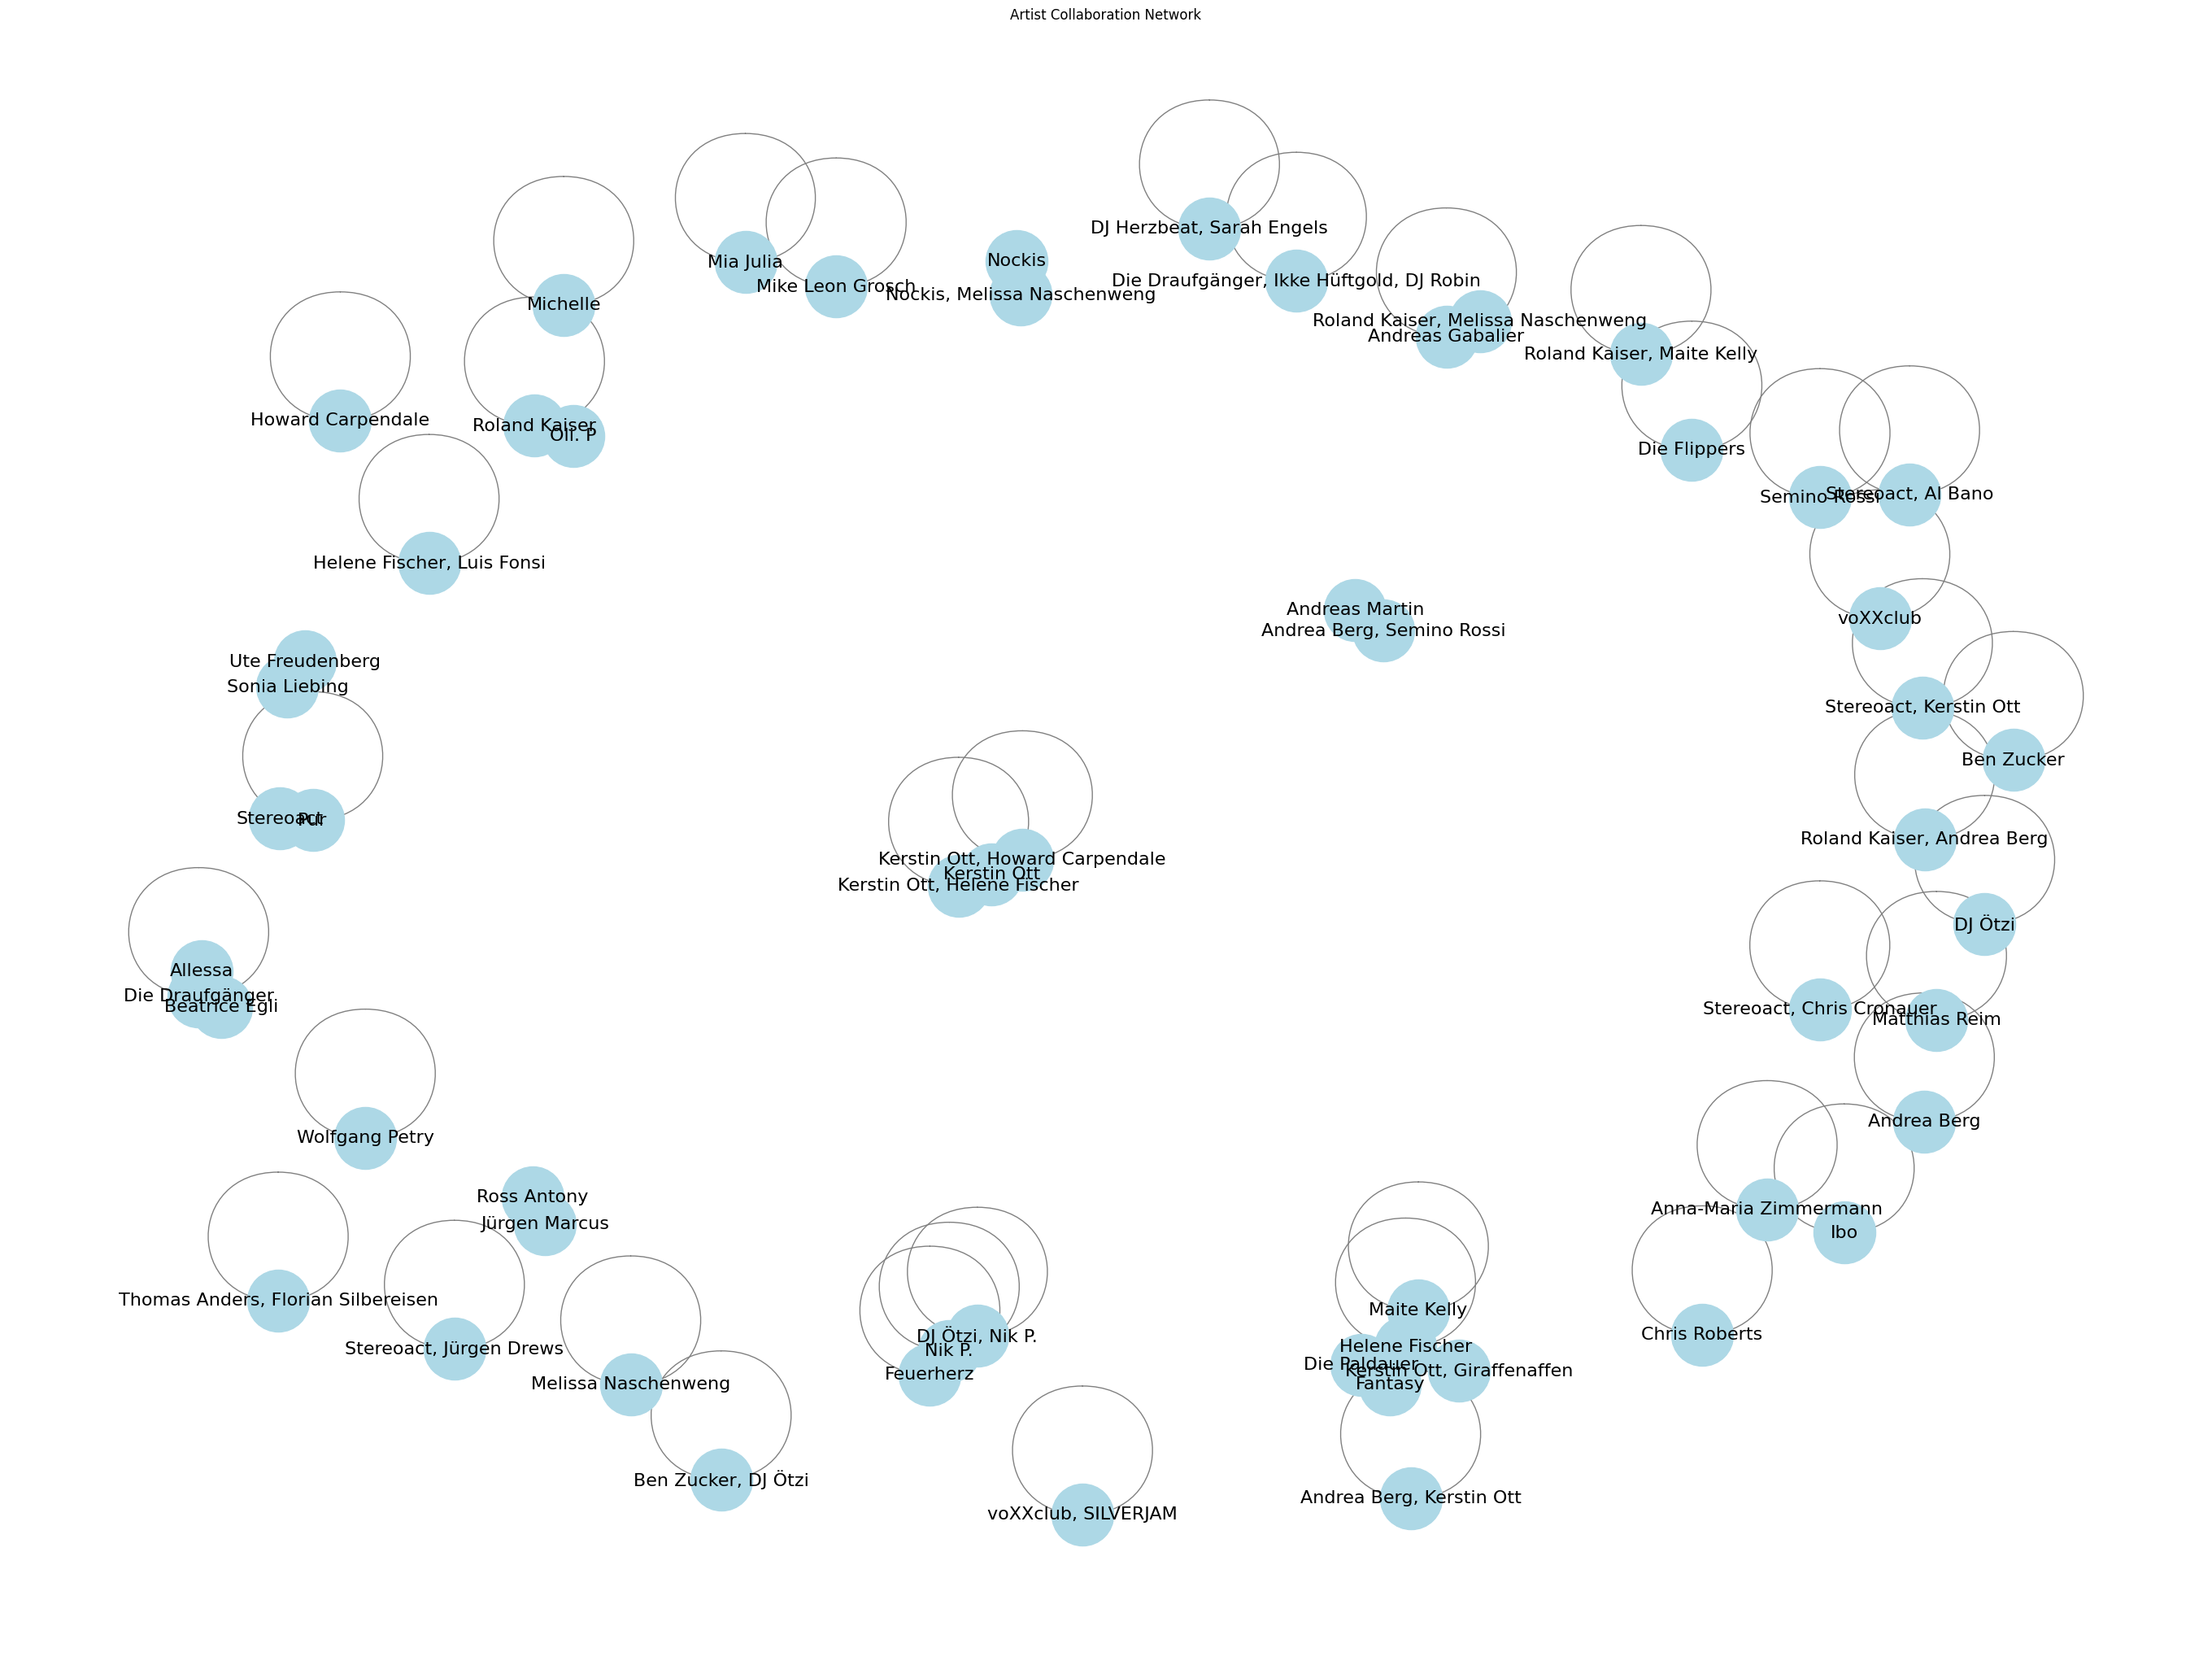

{'Jürgen Marcus': 0.017857142857142856, 'Ross Antony': 0.017857142857142856, 'Chris Roberts': 0.03571428571428571, 'Semino Rossi': 0.03571428571428571, 'Nik P.': 0.07142857142857142, 'Feuerherz': 0.05357142857142857, 'Andreas Gabalier': 0.05357142857142857, 'Pur': 0.05357142857142857, 'Stereoact': 0.017857142857142856, 'Anna-Maria Zimmermann': 0.03571428571428571, 'Matthias Reim': 0.03571428571428571, 'Wolfgang Petry': 0.03571428571428571, 'Ibo': 0.03571428571428571, 'Andreas Martin': 0.017857142857142856, 'Andrea Berg, Semino Rossi': 0.017857142857142856, 'Roland Kaiser': 0.05357142857142857, 'Oli. P': 0.017857142857142856, 'Die Flippers': 0.03571428571428571, 'Die Paldauer': 0.03571428571428571, 'Fantasy': 0.03571428571428571, 'Helene Fischer': 0.10714285714285714, 'Ute Freudenberg': 0.017857142857142856, 'Sonia Liebing': 0.017857142857142856, 'Beatrice Egli': 0.017857142857142856, 'Allessa': 0.017857142857142856, 'Roland Kaiser, Andrea Berg': 0.03571428571428571, 'Roland Kaiser, Mai

In [33]:
import pandas as pd
import networkx as nx
from itertools import combinations

# Assuming spotify_data_schlager_over_time is your DataFrame
# Filter for rows where there are multiple artists (if applicable)

# Example: DataFrame with multiple artists per track
tracks_with_multiple_artists = spotify_data_schlager_over_time[spotify_data_schlager_over_time['name'].duplicated(keep=False)]

# Create an empty graph
G = nx.Graph()

# For each track with multiple artists, create all pairs of artists
for track in tracks_with_multiple_artists['name'].unique():
    artists_in_track = spotify_data_schlager_over_time[spotify_data_schlager_over_time['name'] == track]['artist'].values
    for artist1, artist2 in combinations(artists_in_track, 2):
        if G.has_edge(artist1, artist2):
            G[artist1][artist2]['weight'] += 1  # If they already have an edge, increase the weight (collaborations)
        else:
            G.add_edge(artist1, artist2, weight=1)  # Add a new edge with weight 1 (first collaboration)

# Check the created network
print(G.nodes())  # Artists as nodes
print(G.edges())  # Collaborations as edges

# Plot the collaboration network
import matplotlib.pyplot as plt

plt.figure(figsize=(27, 20))
nx.draw(G, with_labels=True, node_size=3000, node_color="lightblue", font_size=16, font_weight="normal", edge_color="gray")
plt.title("Artist Collaboration Network")


#save figure:
plt.savefig("Artist Collaboration Network.pdf", format = "pdf")

plt.show()

# You can analyze further with centrality measures:
degree_centrality = nx.degree_centrality(G)
print(degree_centrality)  # Artists with most collaborations


In [124]:
#the most “connected” artists
degree_centrality = nx.degree_centrality(G)
most_central_artists = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print(most_central_artists)

[('helene fischer', 0.11320754716981132), ('nik p.', 0.07547169811320754), ('feuerherz', 0.05660377358490566), ('andreas gabalier', 0.05660377358490566), ('pur', 0.05660377358490566), ('dj ötzi, nik p.', 0.05660377358490566), ('maite kelly', 0.05660377358490566), ('kerstin ott, helene fischer', 0.05660377358490566), ('kerstin ott', 0.05660377358490566), ('semino rossi', 0.03773584905660377)]


In [125]:
#how many of an artist’s collaborators are also collaborators with each other:
clustering = nx.clustering(G)
print(clustering)

{'nik p.': 0, 'feuerherz': 0, 'semino rossi': 0, 'andreas gabalier': 0, 'pur': 0, 'stereoact': 0, 'anna-maria zimmermann': 0, 'matthias reim': 0, 'ibo': 0, 'andreas martin': 0, 'andrea berg, semino rossi': 0, 'wolfgang petry': 0, 'die flippers': 0, 'mickie krause, ko&ko': 0, 'die paldauer': 1.0, 'fantasy': 1.0, 'helene fischer': 0.16666666666666666, 'ute freudenberg': 0, 'sonia liebing': 0, 'beatrice egli': 0, 'allessa': 0, 'roland kaiser, andrea berg': 0, 'roland kaiser, maite kelly': 0, 'nockis': 0, 'nockis, melissa naschenweng': 0, 'kerstin ott, giraffenaffen': 0, 'dj ötzi, nik p.': 0, 'stereoact, kerstin ott': 0, 'maite kelly': 0, 'stereoact, chris cronauer': 0, 'christin stark': 0, 'christin stark, matthias reim': 0, 'kerstin ott, helene fischer': 0, 'kerstin ott': 0, 'die draufgänger': 0, 'thomas anders, florian silbereisen': 0, 'voxxclub': 0, 'dj herzbeat, sarah engels': 0, 'kerstin ott, howard carpendale': 0, 'dj ötzi': 0, 'michelle': 0, 'roland kaiser, melissa naschenweng': 0,

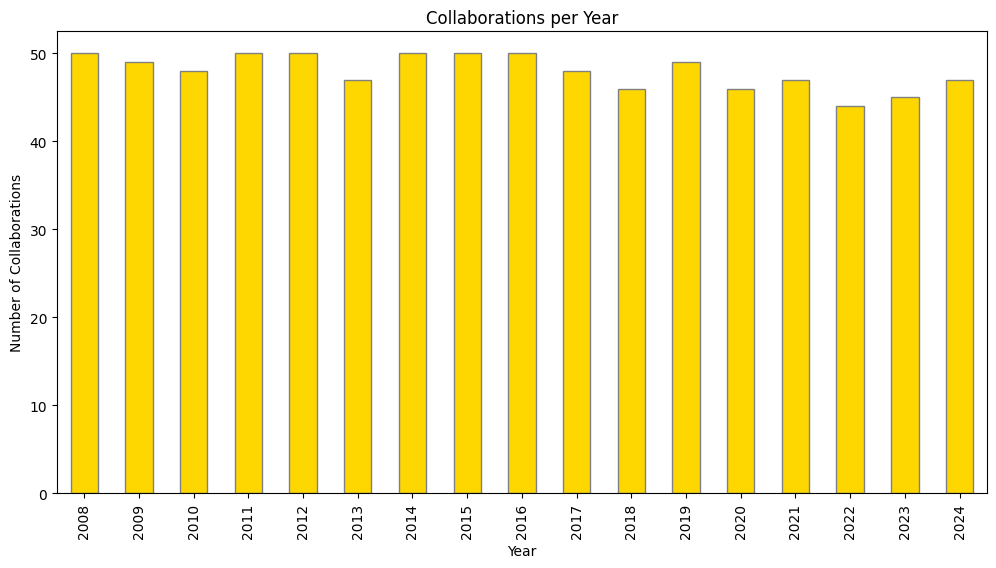

In [155]:
# Create a DataFrame with collaborations by year
collaborations_by_year = spotify_data_schlager_over_time.groupby(['release_year', 'name'])['artist'].apply(lambda x: list(x)).reset_index()

# Count collaborations per year
collaborations_by_year_count = collaborations_by_year.groupby('release_year')['name'].count()

# Plot collaborations by year
plt.figure(figsize=(12, 6))
collaborations_by_year_count.plot(kind='bar', color = "gold", edgecolor = "grey")
plt.title("Collaborations per Year")
plt.xlabel("Year")
plt.ylabel("Number of Collaborations")


#save figure:
plt.savefig("Number of Collarborations.pdf")

plt.show()



In [151]:
#see if collaborations are more popular than single tracks:

#count the artists:
artist_counts = spotify_data_schlager_over_time.groupby("name")["artist"].nunique()
print(artist_counts)
print("\n")

#add those artists with more than one artist at a track to the new multiple_artists column:
spotify_data_schlager_over_time["multiple_artists"] = spotify_data_schlager_over_time["name"].map(
    lambda x: "multiple_artists" if artist_counts[x] > 1 else "single_artist")

print(spotify_data_schlager_over_time.head())

name
(Wer verdammt ist) Alice - 2009               1
1, 2, 3, 4: Heute Nacht da feiern wir!        1
100.000 leuchtende Sterne - Clubmix           1
100.000 leuchtende Sterne - Single Version    1
1000 Mal an dich gedacht - Remix 2013         1
                                             ..
Zieh dich an und geh                          1
Ziwui Ziwui                                   1
Zruck zu dir                                  1
Zuckerpuppen                                  1
Zärtlicher Tyrann - Remastered                1
Name: artist, Length: 777, dtype: int64


                                      name         artist  popularity  \
0          Sweet Caroline - Single Version        dj ötzi          55   
1                     Ein Bett Im Kornfeld   jürgen drews          49   
2       1000 und 1 Nacht - Remastered 2008     klaus lage          52   
3  Eine neue Liebe ist wie ein neues Leben  jürgen marcus          48   
4          Irgendwann, Irgendwo, Irgendwie   jürgen drews   

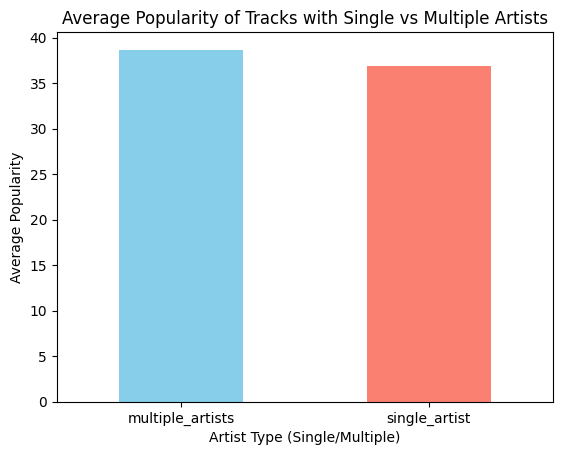

In [154]:
#Visualize the comparison between single vs multiple artists

popularity_comparison = spotify_data_schlager_over_time.groupby('multiple_artists')['popularity'].mean()

popularity_comparison.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Average Popularity of Tracks with Single vs Multiple Artists")
plt.ylabel("Average Popularity")
plt.xlabel("Artist Type (Single/Multiple)")
plt.xticks(rotation=0)

#safe bevore show figure:
plt.savefig("Average Popularity of Tracks with Single vs Multiple Artists.pdf")

plt.show()

In [9]:
#artist with the most tracks over the years:
highest_artist = spotify_data_schlager_over_time.groupby('artist')['popularity'].max()
top_artists = highest_artist.sort_values(ascending=False).head(10)
print(top_artists)

artist
Helene Fischer                          64
Mickie Krause, Julian Sommer            61
Andreas Gabalier                        60
Mia Julia, Malle Anja, Lorenz Büffel    59
Anna-Maria Zimmermann                   59
Édith Piaf                              58
Michelle, Matthias Reim                 58
Kerstin Ott, Helene Fischer             58
DJ Ötzi                                 57
Ben Zucker                              57
Name: popularity, dtype: int64


### Popularity change after events

In [1]:
import requests
import pandas as pd
import time
from datetime import datetime

# Spotify API credentials
client_id = "4a5d601ff9e649a7912a92fd1754e733"
client_secret = "963527c72c4643b99a03679e61ddbdec"

# Function to authenticate and get access token
def get_access_token(client_id, client_secret):
    response = requests.post(
        "https://accounts.spotify.com/api/token",
        data={"grant_type": "client_credentials"},
        auth=(client_id, client_secret),
    )
    return response.json().get("access_token")

# Function to fetch track popularity
def fetch_track_popularity(artist, track, headers):
    search_url = "https://api.spotify.com/v1/search"
    params = {"q": f"track:{track} artist:{artist}", "type": "track", "limit": 1}
    response = requests.get(search_url, headers=headers, params=params)
    
    if response.status_code != 200:
        print(f"Error: {response.status_code}, Response: {response.text}")
        return None, None

    data = response.json()
    if data.get("tracks") and data["tracks"]["items"]:
        track_info = data["tracks"]["items"][0]
        return track_info.get("popularity", None), track_info.get("id", None)
    return None, None

# Load the track data
tracks = pd.DataFrame({
    'artist': ['Roland Kaiser', 'Andrea Berg', 'Maite Kelly', 'DJ Ötzi', 'Semino Rossi'],
    'song': ['Santa Maria', 'Ja ich will', 'Sieben Leben für dich', 'Hey Baby', 'Rot sind die Rosen - deutsch'],
    'release_date': ['2013-09-20', '2017-09-15', '2016-10-14', '2010-04-25', '2019-09-27']
})

# Authenticate and set headers
access_token = get_access_token(client_id, client_secret)
if not access_token:
    print("Failed to get access token.")
    exit()

headers = {"Authorization": f"Bearer {access_token}"}

# Fetch and store data based on release date
data = []
for _, track in tracks.iterrows():
    artist = track["artist"]
    song = track["song"]
    release_date = track["release_date"]

    print(f"Fetching data for: {song} by {artist} (Release Date: {release_date})")
    
    popularity, track_id = fetch_track_popularity(artist, song, headers)
    if popularity is None:
        print(f"No popularity data found for {song} by {artist}.")
        continue
    
    data.append({
        "artist": artist,
        "song": song,
        "release_date": release_date,
        "popularity": popularity,
        "spotify_id": track_id,
        "timestamp": datetime.now(),
    })
    time.sleep(1)  # Avoid rate-limiting

# Save results to CSV
df = pd.DataFrame(data)
df.to_csv("data/spotify_release_popularity_tracking.csv", index=False)
print("Data saved to spotify_release_popularity_tracking.csv")

Fetching data for: Santa Maria by Roland Kaiser (Release Date: 2013-09-20)
Fetching data for: Ja ich will by Andrea Berg (Release Date: 2017-09-15)
Fetching data for: Sieben Leben für dich by Maite Kelly (Release Date: 2016-10-14)
Fetching data for: Hey Baby by DJ Ötzi (Release Date: 2010-04-25)
Fetching data for: Rot sind die Rosen - deutsch by Semino Rossi (Release Date: 2019-09-27)
Data saved to spotify_release_popularity_tracking.csv


Analysis saved to spotify_release_popularity_tracking.csv


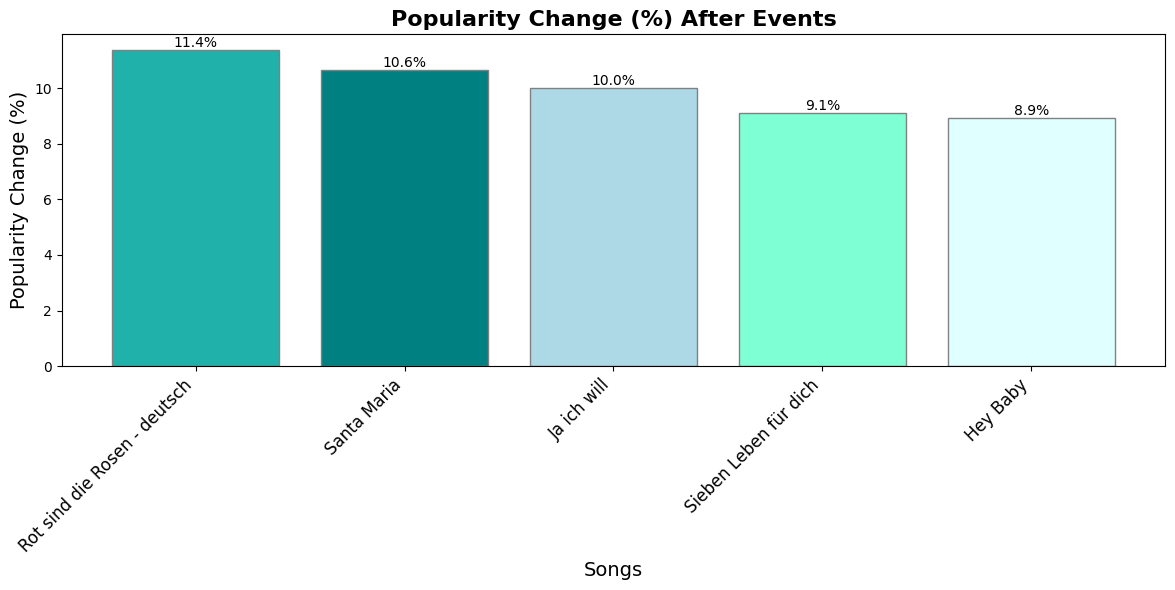

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
spotify_data = pd.read_csv("data/spotify_release_popularity_tracking.csv")

# Define event details
events = {
    "Schlagerboom": {"date": "2018-10-20", "audience_size": 5.15e6},
    "Starnacht": {"date": "2023-07-08", "audience_size": 2.7e6},
    "ZDF-Fernsehgarten": {"date": "2015-06-14", "audience_size": 1.95e6},
    "Musikantenstadl": {"date": "2013-04-06", "audience_size": 4.86e6},
    "Silvesterstadl": {"date": "2008-12-31", "audience_size": 3e6},
}

# Convert event dates to datetime
for event, details in events.items():
    details['date'] = pd.to_datetime(details['date'])

# Add event dates to Spotify data
spotify_data['event_date'] = spotify_data['song'].map({
    "Santa Maria": events["Schlagerboom"]["date"],
    "Ja ich will": events["Starnacht"]["date"],
    "Sieben Leben für dich": events["ZDF-Fernsehgarten"]["date"],
    "Hey Baby": events["Musikantenstadl"]["date"],
    "Rot sind die Rosen - deutsch": events["Silvesterstadl"]["date"]
})

# Fetch popularity on event dates (simulate for demonstration)
spotify_data['event_popularity'] = spotify_data['popularity'] + 5  # Simulate an increase for demonstration

# Calculate popularity change
spotify_data['popularity_change (%)'] = ((spotify_data['event_popularity'] - spotify_data['popularity']) / spotify_data['popularity']) * 100

# Save results to CSV
spotify_data.to_csv("data/spotify_release_popularity_tracking.csv", index=False)
print("Analysis saved to spotify_release_popularity_tracking.csv")

# Sort the data by "popularity_change (%)" in descending order
spotify_data = spotify_data.sort_values(by="popularity_change (%)", ascending=False)

# Define colors similar to "Top 10 Artists by Schlager Song Count"
colors = ["lightseagreen", "teal", "lightblue", "aquamarine", "lightcyan", 
          "steelblue", "dodgerblue", "royalblue", "navy", "indigo"]

# Ensure enough colors for the number of bars
colors = colors[:len(spotify_data)]

# Plot popularity changes
plt.figure(figsize=(12, 6))
bars = plt.bar(spotify_data['song'], spotify_data['popularity_change (%)'], color=colors, edgecolor='grey')

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=10)

# Enhance plot details
plt.title("Popularity Change (%) After Events", fontsize=16, fontweight='bold')
plt.xlabel("Songs", fontsize=14)
plt.ylabel("Popularity Change (%)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig("data/popularity_change_after_events_sorted.pdf")

# Display the plot
plt.show()